<a href="https://colab.research.google.com/github/ArcturusMajere/Fall-2022-Python-Programming-for-Data-Science/blob/main/covnetNewbie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks with Keras and TensorFlow Exercise (5 points)

This exercise is designed for students with beginner and intermediate skills in neural networks. If you have advanced skills in neural networks, please attempt the other exercise found in this folder. It is up to the students to evaluate whether their skills in working with neural networks are at the beginner, intermediate, or advanced level. 

## 1. Load the Dataset

For this exercise, we will use the Fashion MNIST dataset, which consists of 60,000 train and 10,000 test images of fashion items. 

More information about the dataset can be found [here](https://keras.io/api/datasets/fashion_mnist/).

First, import the necessary libraries (TensorFlow, Keras, NumPy, Matplotlib), and aferward load the Fashion MNIST dataset. The dataset can be loaded directly from the Keras built-in datasets.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.layers import Input
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Display the shape of the train and test arrays of images and labels. 

In [3]:
print("training dimensions:" ,x_train.shape, y_train.shape) 
print("test dimensions:",x_test.shape, y_test.shape)

training dimensions: (60000, 28, 28) (60000,)
test dimensions: (10000, 28, 28) (10000,)


Display the maximum and minimum values of the images. 

In [4]:
print("maximum values of x_train, x_test, y_train, y_test, respectively are",
      x_train.max(), x_test.max(), y_train.max(), y_test.max())
print("minimum values of x_train, x_test, y_train, y_test, respectively are",
      x_train.min(), x_test.min(), y_train.min(), y_test.min())
print('Max pixel value', np.max(x_train))
print('Min pixel value', np.min(x_train))
print('Average pixel value', np.round(np.mean(x_train)))
print('Data type', x_train[0].dtype)

maximum values of x_train, x_test, y_train, y_test, respectively are 255 255 9 9
minimum values of x_train, x_test, y_train, y_test, respectively are 0 0 0 0
Max pixel value 255
Min pixel value 0
Average pixel value 73.0
Data type uint8


Resize the images to be in the [0,1] range, and display again the maximum and minimum values to make sure that the scaling was done properly.

In [5]:
x_train = x_train / 255
x_test = x_test / 255
print("maximum values of x_train, x_test, y_train, y_test, respectively are",
      x_train.max(), x_test.max(), y_train.max(), y_test.max())
print("minimum values of x_train, x_test, y_train, y_test, respectively are",
      x_train.min(), x_test.min(), y_train.min(), y_test.min())
print('Max pixel value', np.max(x_train))
print('Min pixel value', np.min(x_train))
print('Average pixel value', np.round(np.mean(x_train)))
print('Data type', x_train[0].dtype)

maximum values of x_train, x_test, y_train, y_test, respectively are 1.0 1.0 9 9
minimum values of x_train, x_test, y_train, y_test, respectively are 0.0 0.0 0 0
Max pixel value 1.0
Min pixel value 0.0
Average pixel value 0.0
Data type float64


Convert the train and test label arrays into one-hot encoding format.

In [6]:
y_train1hot = keras.utils.to_categorical(y_train, 10)
y_test1hot = keras.utils.to_categorical(y_test, 10)
print('Labels train shape: {}'.format(y_train1hot.shape))
print('Labels test shape: {}'.format(y_test1hot.shape))

Labels train shape: (60000, 10)
Labels test shape: (10000, 10)


Display several images in the training dataset **and their labels**. 

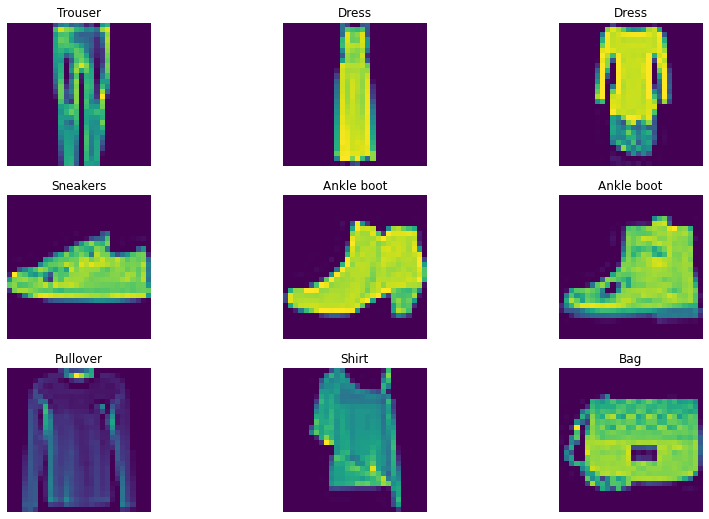

In [7]:
label_names =  ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot']

plt.figure(figsize=(14, 9))
for n in range(9):
    i = np.random.randint(0, len(x_train), 1)
    ax = plt.subplot(3, 3, n+1)
    plt.imshow(x_train[i[0]])
    l = int(y_train[i])
    plt.title(label_names[l])
    plt.axis('off')

## 2. Model Definition and Training

Create a model called `fminst_1` which has the following layers:
- Input layer
- Convolutional layer with 128 filters and kernel size of 3
- Convolutional layer with 128 filters and kernel size of 3
- Max-pooling layer 
- Flatten layer
- Dense layer with 64 neurons
- Output dense layer with 10 neurons

In [8]:
inputs = Input(shape=(28, 28, 1))
conv1a = Conv2D(filters=128, kernel_size=3)(inputs)
conv1b = Conv2D(filters=128, kernel_size=3)(conv1a)
pool1 = MaxPooling2D()(conv1b)
flat = Flatten()(pool1)
dense1 = Dense(64, activation='relu')(flat)
outputs = Dense(10, activation='softmax')(dense1)
fmnist_1 = Model(inputs, outputs)

Display a summary of the model. State how many parameters the model has.

In [9]:
fmnist_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 64)                1179712   
                                                             

Reshape the train arrays of images from the current shape of (60000, 28, 28) to (60000, 28, 28, 1).
Repeat the same for the test array of images.

In [10]:
X_train = x_train.reshape(60000, 28, 28, 1)
X_test  = x_test.reshape(10000,28,28,1)

Compile the model using Adam optimizer, and train the model for 10 epochs using a batch size of 128 images.

In [11]:
fmnist_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
fmnist_1.fit(X_train, y_train1hot, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 15s 15ms/step - loss: 0.4191 - accuracy: 0.8524
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2664 - accuracy: 0.9030
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2145 - accuracy: 0.9226
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1800 - accuracy: 0.9346
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1491 - accuracy: 0.9450
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1283 - accuracy: 0.9519
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.1131 - accuracy: 0.9586
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0948 - accuracy: 0.9645
Epoch 9/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0841 - accuracy: 0.9690
Epoch 10/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0745 - accur

Calculate the accuracy of the model on the test dataset.

In [12]:
evals_test = fmnist_1.evaluate(X_test, y_test1hot)
preds = fmnist_1.predict(X_test)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 1s 2ms/step
Classification Accuracy:  0.9092000126838684


Plot a few images in the test dataset and display the ground-truth and predicted labels. 

TypeError: ignored

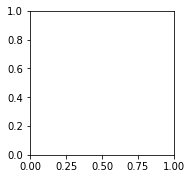

In [38]:
plt.figure(figsize=(12, 9))
for n in range(9):
    i = np.random.randint(0, len(X_test), 1)
    ax = plt.subplot(3, 3, n+1)
    plt.imshow(X_test[i[0]])
    plt.title('Label: ' + str(label_names[y_test[i[0]]]) + '   Predicted: ' + str(label_names[np.argmax(preds[i[0]])]))
    plt.axis('off')

## 3. Define a Larger Model and Use Validation Split

Create a model called `fmnist_2` which has 3 blocks of Conv-Conv-MaxPooling layers with 64-128-256 filters per block, followed by a classifier with a Flatten layer and a sequence of Dense layers with 100, 50, and 10 neurons. 

In [18]:
inputs = Input(shape=(28, 28, 1))
conv1a = Conv2D(filters=64, kernel_size=3, padding='same')(inputs)
conv1b = Conv2D(filters=64, kernel_size=3, padding='same')(conv1a)
pool1 = MaxPooling2D()(conv1b)
conv2a = Conv2D(filters=128, kernel_size=3, padding='same')(pool1)
conv2b = Conv2D(filters=128, kernel_size=3, padding='same')(conv2a)
pool2 = MaxPooling2D()(conv2b)
conv3a = Conv2D(filters=256, kernel_size=3, padding='same')(pool2)
conv3b = Conv2D(filters=256, kernel_size=3, padding='same')(conv3a)
pool3 = MaxPooling2D()(conv3b)
flat = Flatten()(pool3)
dense1 = Dense(100, activation='relu')(flat)
dense2 = Dense(50, activation='relu')(dense1)
outputs = Dense(10, activation='softmax')(dense2)
fmnist_2= Model(inputs, outputs)
fmnist_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       147584    
                                                           

Compile and train the model for 10 epochs with a batch size of 128. Use 25% of the training data for validation. 

In [20]:
fmnist_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
fmnist_2.fit(X_train, y_train1hot, epochs=10,validation_split=0.25, batch_size=128)

Epoch 1/10
352/352 [==============================] - 10s 25ms/step - loss: 0.3902 - accuracy: 0.8608 - val_loss: 0.3201 - val_accuracy: 0.8857
Epoch 2/10
352/352 [==============================] - 8s 24ms/step - loss: 0.2952 - accuracy: 0.8928 - val_loss: 0.2976 - val_accuracy: 0.8899
Epoch 3/10
352/352 [==============================] - 9s 24ms/step - loss: 0.2521 - accuracy: 0.9079 - val_loss: 0.3317 - val_accuracy: 0.8765
Epoch 4/10
352/352 [==============================] - 9s 25ms/step - loss: 0.2257 - accuracy: 0.9162 - val_loss: 0.2879 - val_accuracy: 0.8945
Epoch 5/10
352/352 [==============================] - 8s 24ms/step - loss: 0.2035 - accuracy: 0.9259 - val_loss: 0.2725 - val_accuracy: 0.9051
Epoch 6/10
352/352 [==============================] - 9s 25ms/step - loss: 0.1815 - accuracy: 0.9320 - val_loss: 0.2890 - val_accuracy: 0.9013
Epoch 7/10
352/352 [==============================] - 9s 26ms/step - loss: 0.1767 - accuracy: 0.9357 - val_loss: 0.2798 - val_accuracy: 0.906

Calculate the accuracy on the test dataset. 

Discuss whether the model overfits the training data.

In [21]:
evals_test = fmnist_2.evaluate(X_test, y_test1hot)
preds = fmnist_2.predict(X_test)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 1s 3ms/step
Classification Accuracy:  0.9034000039100647


## 4. Apply Dropout, Early Stopping

Create a model `fmnist_3` which uses a similar network from the previous section but it has a block of layers with 32-64-128 convolutional filters, and add at least 4 Dropout layers in the model. Select a dropout rate of 10% of the neurons. 

In [22]:

inputs = Input(shape=(28, 28, 1))
conv1a = Conv2D(filters=32, kernel_size=3, padding='same')(inputs)
conv1b = Conv2D(filters=32, kernel_size=3, padding='same')(conv1a)
pool1 = MaxPooling2D()(conv1b)
dropout1 = Dropout(0.1)(pool1)
conv2a = Conv2D(filters=64, kernel_size=3, padding='same')(dropout1)
conv2b = Conv2D(filters=64, kernel_size=3, padding='same')(conv2a)
pool2 = MaxPooling2D()(conv2b)
dropout2 = Dropout(0.1)(pool2)
conv3a = Conv2D(filters=128, kernel_size=3, padding='same')(dropout2)
conv3b = Conv2D(filters=128, kernel_size=3, padding='same')(conv3a)
pool3 = MaxPooling2D()(conv3b)
flat = Flatten()(pool3)
dense1 = Dense(128, activation='relu')(flat)
dropout3 = Dropout(0.1)(dense1)
dense2 = Dense(64, activation='relu')(dropout3)
dropout4 = Dropout(0.1)(dense2)
outputs = Dense(10, activation='softmax')(dropout4)

fmnist_3 = Model(inputs, outputs)
fmnist_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                           

Train the model, and apply an Early Stopping callback, so that the training stops automatically with a patience of 5 epochs. 

Measure the time for training the model.

In [24]:
now = datetime.datetime.now;t = now()
fmnist_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 
t = now()
history3 = fmnist_3.fit(X_train, y_train1hot, validation_split=0.2, batch_size=128,epochs=10, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience = 5)])
print('Training time: %s' % (now() - t))

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.2559 - accuracy: 0.9072 - val_loss: 0.2611 - val_accuracy: 0.9039
Epoch 2/10
375/375 [==============================] - 5s 12ms/step - loss: 0.2346 - accuracy: 0.9131 - val_loss: 0.2543 - val_accuracy: 0.9081
Epoch 3/10
375/375 [==============================] - 5s 12ms/step - loss: 0.2173 - accuracy: 0.9188 - val_loss: 0.2514 - val_accuracy: 0.9106
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1986 - accuracy: 0.9251 - val_loss: 0.2518 - val_accuracy: 0.9106
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1891 - accuracy: 0.9289 - val_loss: 0.2483 - val_accuracy: 0.9149
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1863 - accuracy: 0.9301 - val_loss: 0.2693 - val_accuracy: 0.9080
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1733 - accuracy: 0.9345 - val_loss: 0.2639 - val_accuracy: 0.9141

Plot the accuracy and loss curves.

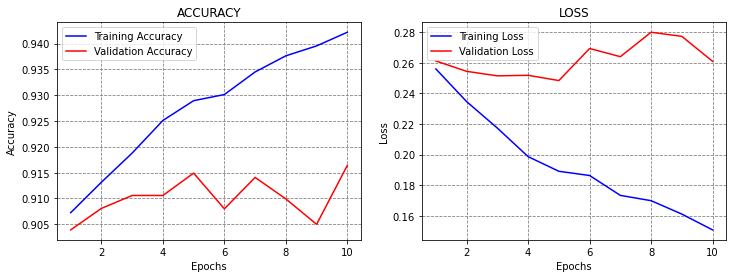

In [26]:

train_loss = history3.history['loss']
val_loss = history3.history['val_loss']
acc = history3.history['accuracy'] 
val_acc = history3.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()            
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show() 

Calculate the accuracy on the test dataset.

In [27]:
evals_test = fmnist_3.evaluate(X_test, y_test1hot)
preds = fmnist_3.predict(X_test)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 1s 2ms/step
Classification Accuracy:  0.9126999974250793


## 5. Batch Normalization, and Data Augmentation

Create a model `fmnist_4` which applies a batch normalization layer to each convolutional block of layers in the model from the previous section. 

In [28]:

inputs = Input(shape=(28, 28, 1))
conv1a = Conv2D(filters=32, kernel_size=3, padding='same')(inputs)
conv1b = Conv2D(filters=32, kernel_size=3, padding='same')(conv1a)
bn1 = BatchNormalization()(conv1b)
pool1 = MaxPooling2D()(bn1)
dropout1 = Dropout(0.1)(pool1)
conv2a = Conv2D(filters=64, kernel_size=3, padding='same')(dropout1)
conv2b = Conv2D(filters=64, kernel_size=3, padding='same')(conv2a)
bn2 = BatchNormalization()(conv2b)
pool2 = MaxPooling2D()(bn2)
dropout2 = Dropout(0.1)(pool2)
conv3a = Conv2D(filters=128, kernel_size=3, padding='same')(dropout2)
conv3b = Conv2D(filters=128, kernel_size=3, padding='same')(conv3a)
bn3 = BatchNormalization()(conv3b)
pool3 = MaxPooling2D()(bn3)
flat = Flatten()(pool3)
dense1 = Dense(128, activation='relu')(flat)
dropout3 = Dropout(0.1)(dense1)
dense2 = Dense(64, activation='relu')(dropout3)
dropout4 = Dropout(0.1)(dense2)
outputs = Dense(10, activation='softmax')(dropout4)

fmnist_4 = Model(inputs, outputs)
fmnist_4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0   

Apply data augmentation, by adding width shift, height shift, horizontal and vertical flip, zoom, shear, and rotation. Select the values for the augmentation parameters as you wish. 

In [29]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, vertical_flip=True,
                             horizontal_flip=True, shear_range=0.1, zoom_range=0.1,rotation_range=0.1)

Use the `train_test_split` function to create a validation dataset that contains 20% of the training dataset. 

In [30]:
xtrain, xval, ytrain, yval = train_test_split(X_train, y_train1hot, test_size=0.2, random_state=17)
print('Training images', xtrain.shape)
print('Training labels', ytrain.shape)
print('Validation_images', xval.shape)
print('Validation labels', yval.shape)

Training images (48000, 28, 28, 1)
Training labels (48000, 10)
Validation_images (12000, 28, 28, 1)
Validation labels (12000, 10)


Train the model using Early Stopping and show the training time.

In [32]:
now = datetime.datetime.now;t = now()
fmnist_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
 
t = now()
history4 = fmnist_4.fit(xtrain, ytrain, validation_split=0.2, batch_size=128, 
                    epochs=10, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience = 5)])


print('Training time: %s' % (now() - t))

Epoch 1/10
300/300 [==============================] - 5s 14ms/step - loss: 0.2110 - accuracy: 0.9215 - val_loss: 0.2563 - val_accuracy: 0.9114
Epoch 2/10
300/300 [==============================] - 4s 14ms/step - loss: 0.1887 - accuracy: 0.9297 - val_loss: 0.2641 - val_accuracy: 0.9091
Epoch 3/10
300/300 [==============================] - 4s 14ms/step - loss: 0.1814 - accuracy: 0.9338 - val_loss: 0.2612 - val_accuracy: 0.9111
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 0.1662 - accuracy: 0.9365 - val_loss: 0.2652 - val_accuracy: 0.9092
Epoch 5/10
300/300 [==============================] - 4s 13ms/step - loss: 0.1598 - accuracy: 0.9404 - val_loss: 0.2745 - val_accuracy: 0.9105
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 0.1432 - accuracy: 0.9471 - val_loss: 0.3040 - val_accuracy: 0.9055
Training time: 0:00:24.896602


Plot the accuracy and loss curves.

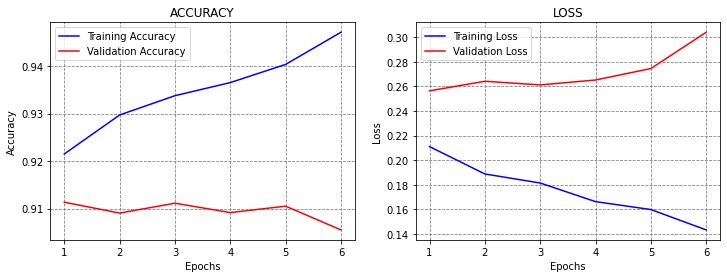

In [33]:
train_loss = history4.history['loss']
val_loss = history4.history['val_loss']
acc = history4.history['accuracy'] 
val_acc = history4.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()            
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show() 

Calculate the accuracy on the test dataset.

In [34]:
evals_test = fmnist_4.evaluate(X_test, y_test1hot)
preds = fmnist_4.predict(X_test)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 1s 2ms/step
Classification Accuracy:  0.9072999954223633


## 6. Saving and Loading the Model

Save the latest model.

In [35]:
fmnist_4.save('MNIST_model4.h5')

Load the saved model and check if the accuracy on the test set matches the one calculated previously. 

In [36]:
loaded_fmnist4 = load_model('MNIST_model4.h5')
evals_test = loaded_fmnist4.evaluate(X_test, y_test1hot)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.3112 - accuracy: 0.9073
Classification Accuracy:  0.9072999954223633


What is the total number of parameters of this model? (Hint: use summary).

Total params: 443,818
Trainable params: 443,370
Non-trainable params: 448

In [37]:
loaded_fmnist4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0   